# Q Learning Netlogo

## Phase 1 Pacman Methods

In [218]:

import numpy as np
import matplotlib.pyplot as plt
import os


In [219]:
p1_m1_1 = 'Results/1-1-ghost-location-ep-return.txt'
p1_m1_2 = 'Results/1-2-ghost-location-ep-ticks.txt'
p1_m1_3 = 'Results/1-3-ghost-location-ep-captures.txt'

p1_m2_1 = 'Results/2-1-visited-patch-ep-return.txt'
p1_m2_2 = 'Results/2-2-visited-patch-ep-ticks.txt'
p1_m2_3 = 'Results/2-3-visited-patch-ep-captures.txt'

p1_m3_1 = 'Results/3-1-nearest-pellet-ep-return.txt'
p1_m3_2 = 'Results/3-2-nearest-pellet-ep-ticks.txt'
p1_m3_3 = 'Results/3-3-nearest-pellet-ep-captures.txt'

p1_m4_1 = 'Results/4-1-combination-ep-return.txt'
p1_m4_2 = 'Results/4-2-combination-ep-ticks.txt'
p1_m4_3 = 'Results/4-3-combination-ep-captures.txt' 

p2_m1_1_g1 = 'Results/d-approx-ep-return-g1.txt'
p2_m1_1_g2 = 'Results/d-approx-ep-return-g2.txt'

p2_m1_2_g2 = 'Results/d-approx-ep-ticks-g2.txt'
p2_m1_2_g1 = 'Results/d-approx-ep-ticks-g1.txt'

p2_m2_1_g1 = 'Results/d-exact-ep-return-g1.txt'
p2_m2_1_g2 = 'Results/d-exact-ep-return-g2.txt'

p2_m2_2_g1 = 'Results/d-exact-ep-ticks-g1.txt'
p2_m2_2_g2 = 'Results/d-exact-ep-ticks-g2.txt'

p2_m3_1 = 'Results/joint-approx-ep-return.txt'
p2_m3_2 = 'Results/joint-approx-ep-ticks.txt'

p2_m4_1 = 'Results/joint-exact-ep-return.txt'
p2_m4_2 = 'Results/joint-exact-ep-ticks.txt'

p3_m1_1 = 'Results/cva-1-pacman-ep-return.txt'
p3_m1_2 = 'Results/cva-2-pacman-ep-ticks.txt'
p3_m1_3 = 'Results/cva-3-pacman-ep-captures.txt'

p3_m1_4 = 'Results/cva-4-ghost-ep-return.txt'
p3_m1_5 = 'Results/cva-5-ghost-ep-ticks.txt'

p3_m2_1 = 'Results/cve-1-pacman-ep-return.txt'
p3_m2_2 = 'Results/cve-2-pacman-ep-ticks.txt'
p3_m2_3 = 'Results/cve-3-pacman-ep-captures.txt'

p3_m2_4 = 'Results/cve-4-ghost-ep-return.txt'
p3_m2_5 = 'Results/cve-5-ghost-ep-ticks.txt'


In [220]:
def graph_episode_return(txt_file, name, color_eps_return = 'blue', color_moving_avg = 'red', linewidth_mov_avg=1, save_graph=False):
    
    
    episode_return = np.loadtxt(txt_file) 
    episode_number = np.arange(len(episode_return))
    
    print("Max Episode Return:", np.max(episode_return))
    print("Min Episode Return:", np.min(episode_return))
    print("Maximum Episode Return at Episode:", np.argmax(episode_return))
    print("Minimum Episode Return at Episode:", np.argmin(episode_return))
    print("Average Episode Return:", np.mean(episode_return))

    window = 500
    moving_avg = np.convolve(episode_return, np.ones(window)/window, mode='valid')
    
    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg, linewidth=linewidth_mov_avg, color=color_moving_avg, label='Moving Average')
    plt.plot(episode_return, alpha=0.2, color=color_eps_return, label=name)
    plt.xlabel('Episode Number')
    plt.ylabel('Episode Return')
    plt.title(f'Episode Return "{name}"')
    plt.legend()
    plt.grid()    
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-return-{name}.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg, linewidth=1, color=color_moving_avg)
    plt.xlabel('Episode Number (Moving Average)')
    plt.ylabel('Episode Return (Moving Average)')
    plt.title(f'Moving Average of Episode Return "{name}"')
    plt.grid()
    plt.show()
    



In [221]:
def graph_episode_ticks(txt_file, name, color_eps_ticks = 'blue', color_moving_avg = 'red', linewidth_mov_avg=1, save_graph=False):
    
    
    episode_ticks = np.loadtxt(txt_file) 
    episode_number = np.arange(len(episode_ticks))
    
    print("Max Episode Ticks:", np.max(episode_ticks))
    print("Min Episode Ticks:", np.min(episode_ticks[episode_ticks>0].min()))
    print("Average Episode Ticks:", np.mean(episode_ticks))

    window = 500
    moving_avg = np.convolve(episode_ticks, np.ones(window)/window, mode='valid')
    
    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg, linewidth=linewidth_mov_avg, color=color_moving_avg, label='Moving Average')
    plt.plot(episode_ticks, alpha=0.2, color=color_eps_ticks, label=name)
    plt.xlabel('Episode Number')
    plt.ylabel('Episode Ticks')
    plt.title(f'Episode Ticks "{name}"')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg, linewidth=1, color=color_moving_avg)
    plt.xlabel('Episode Number (Moving Average)')
    plt.ylabel('Episode Ticks (Moving Average)')
    plt.title(f'Moving Average of Episode Ticks "{name}"')
    plt.grid()
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-ticks-{name}.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')
    plt.show()


In [222]:
def graph_episode_captures(txt_file, name, color_eps_captures = 'blue', color_moving_avg = 'red', linewidth_mov_avg=1, save_graph=False):
    
    
    episode_captures = np.loadtxt(txt_file) 
    episode_number = np.arange(len(episode_captures))
    
    print("Max Episode Captures:", np.max(episode_captures))
    print("Average Episode Captures:", np.mean(episode_captures))

    window = 500
    moving_avg = np.convolve(episode_captures, np.ones(window)/window, mode='valid')
    
    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg, linewidth=linewidth_mov_avg, color=color_moving_avg, label='Moving Average')
    plt.plot(episode_captures, alpha=0.2, color=color_eps_captures, label=name)
    plt.xlabel('Episode Number')
    plt.ylabel('Episode Captures')
    plt.title(f'Episode Captures "{name}"')
    plt.legend()
    plt.grid()
    plt.show()
    
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-captures-{name}.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')
    
    

In [223]:
def compare_episode_ticks(txt_file1, txt_file2, txt_file3, name1, name2, name3, color = 'blue', save_graph=False):
    episode_ticks_1 = np.loadtxt(txt_file1)
    episode_ticks_2 = np.loadtxt(txt_file2)
    episode_ticks_3 = np.loadtxt(txt_file3)
    
    
    window = 500
    moving_avg_1 = np.convolve(episode_ticks_1, np.ones(window)/window, mode='valid')
    moving_avg_2 = np.convolve(episode_ticks_2, np.ones(window)/window, mode='valid')
    moving_avg_3 = np.convolve(episode_ticks_3, np.ones(window)/window, mode='valid') 
    
    plt.figure(figsize=(12, 6))
    plt.plot(moving_avg_1, linewidth=1, color=color, label=name1)
    plt.plot(moving_avg_2, linewidth=1, color='green', label=name2)
    plt.plot(moving_avg_3, linewidth=1, color='orange', label=name3)    
    plt.xlabel('Episode Number')   
    plt.ylabel('Episode Ticks (Moving Average)')
    plt.title('Comparison of Episode Ticks (Moving Average)')
    plt.legend()
    plt.grid()
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-captures-compare.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')    
    plt.show()
    

### Ghost Location Method

In [ ]:
graph_episode_return(p1_m1_1, 'ghost-location-method', save_graph=True)
graph_episode_ticks(p1_m1_2, 'ghost-location-method', save_graph=True)
graph_episode_captures(p1_m1_3, 'ghost-location-method')

Max Episode Return: 173100.0
Min Episode Return: -3349000.0
Maximum Episode Return at Episode: 39047
Minimum Episode Return at Episode: 36726
Average Episode Return: -38641.80432782689


### Visited Patch Method 

Max Episode Return: 173000.0
Min Episode Return: -2307800.0
Maximum Episode Return at Episode: 40694
Minimum Episode Return at Episode: 467
Average Episode Return: 89732.36270549177


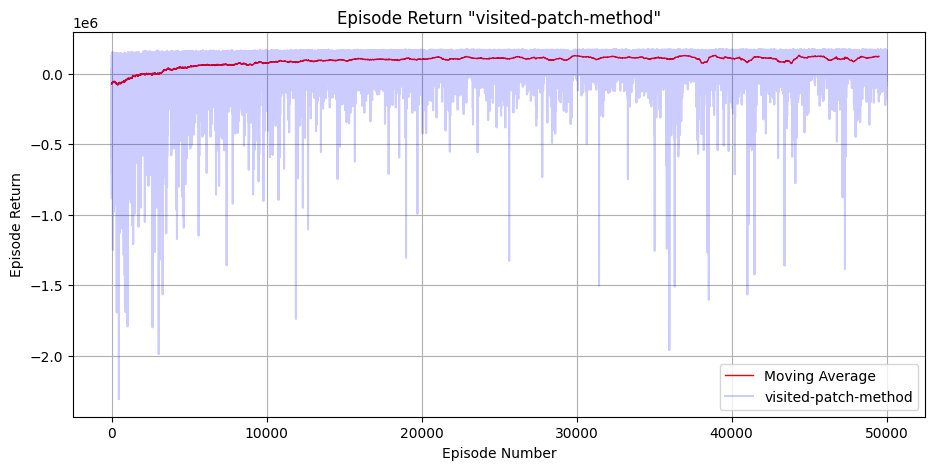

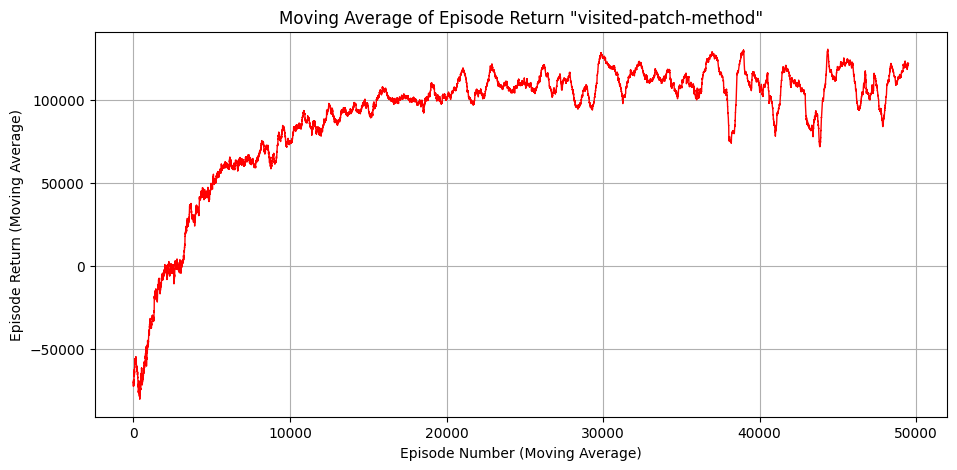

Max Episode Ticks: 7682.0
Min Episode Ticks: 60.0
Average Episode Ticks: 705.2017919283229


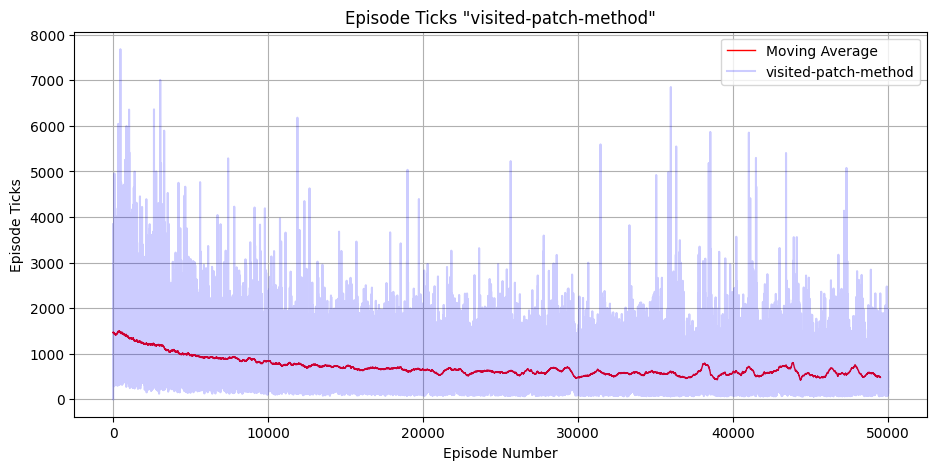

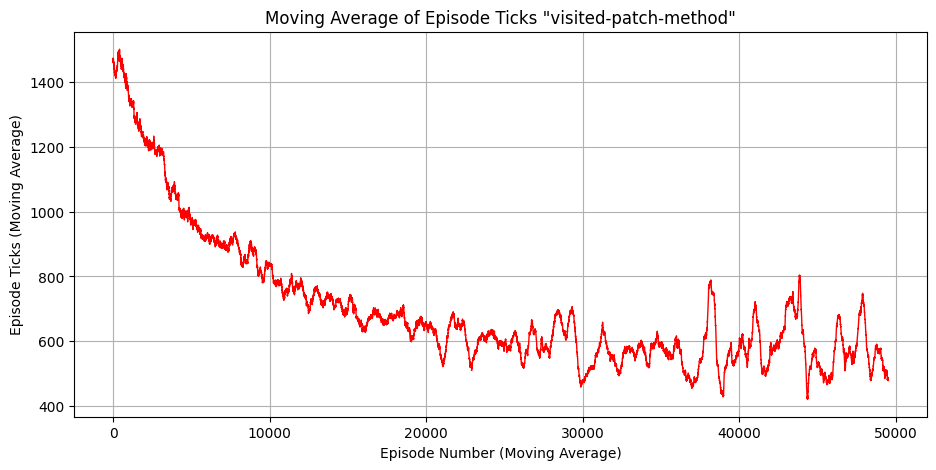

Max Episode Captures: 40.0
Average Episode Captures: 3.8061077556897724


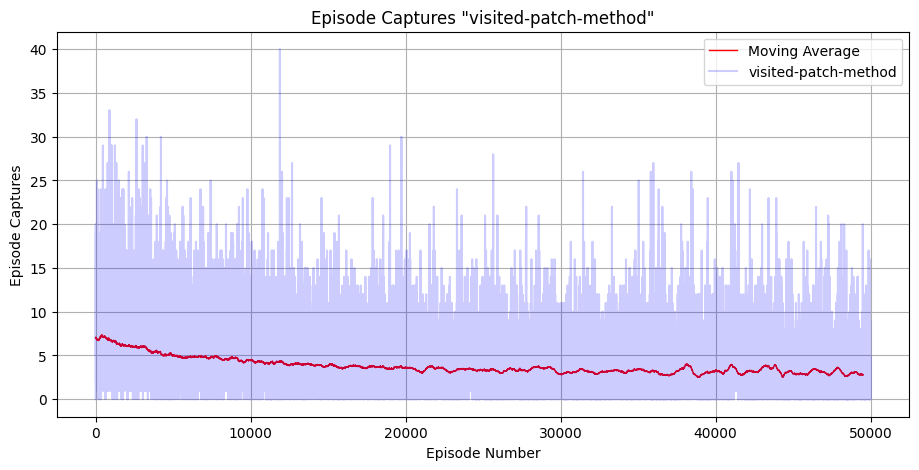

In [ ]:
graph_episode_return(p1_m2_1, 'visited-patch-method', save_graph=True)
graph_episode_ticks(p1_m2_2, 'visited-patch-method', save_graph=True)
graph_episode_captures(p1_m2_3, 'visited-patch-method')

### Nearest Pellet Method 

Max Episode Return: 177335.0
Min Episode Return: -10593785.0
Maximum Episode Return at Episode: 43133
Minimum Episode Return at Episode: 46491
Average Episode Return: 141751.51473941043


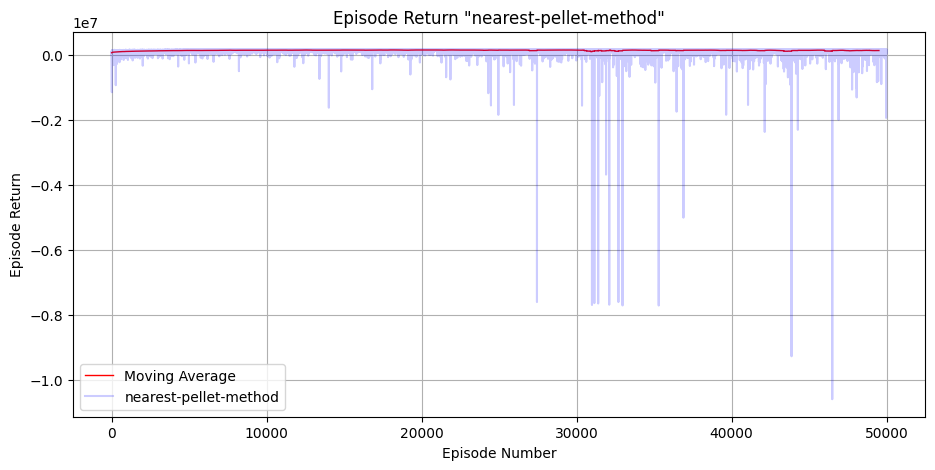

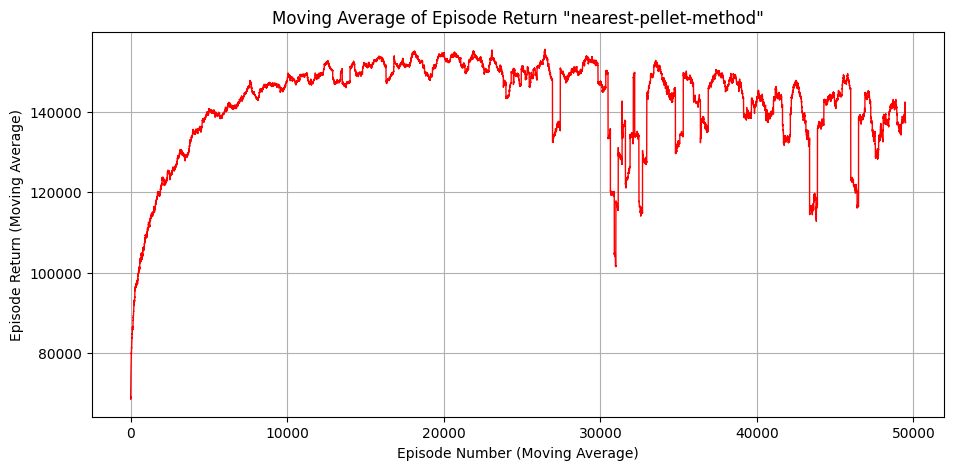

Max Episode Ticks: 72001.0
Min Episode Ticks: 59.0
Average Episode Ticks: 305.3498660053598


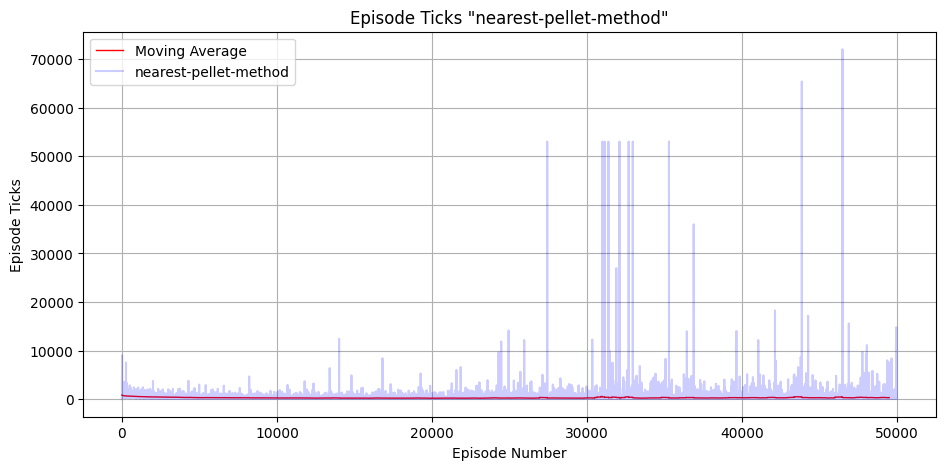

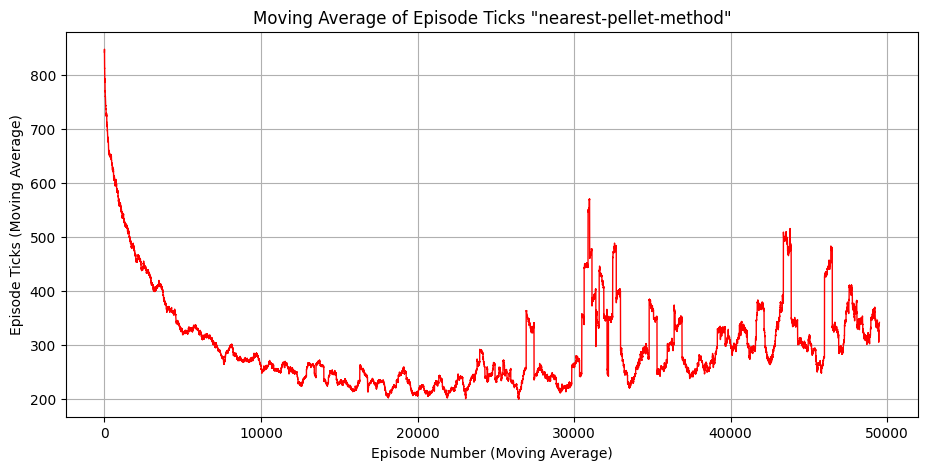

Max Episode Captures: 40.0
Average Episode Captures: 3.8061077556897724


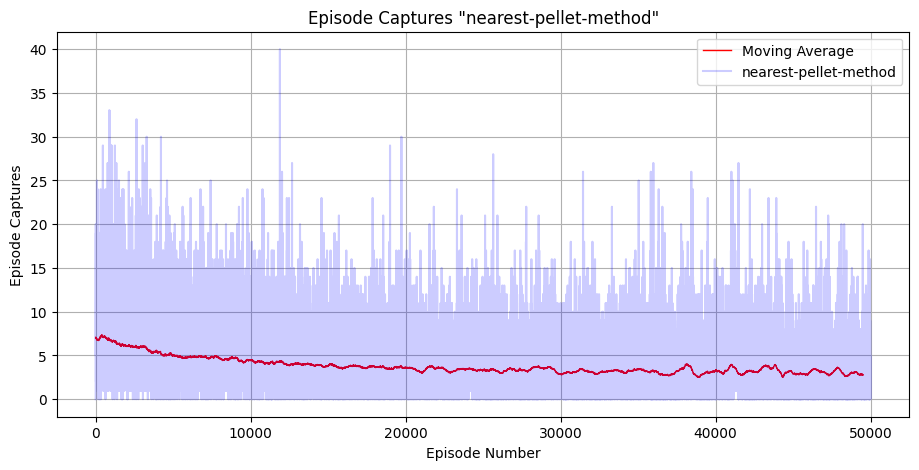

In [ ]:
graph_episode_return(p1_m3_1, 'nearest-pellet-method', save_graph=True)
graph_episode_ticks(p1_m3_2, 'nearest-pellet-method', save_graph=True)
graph_episode_captures(p1_m2_3, 'nearest-pellet-method')

### Comparison of Ticks

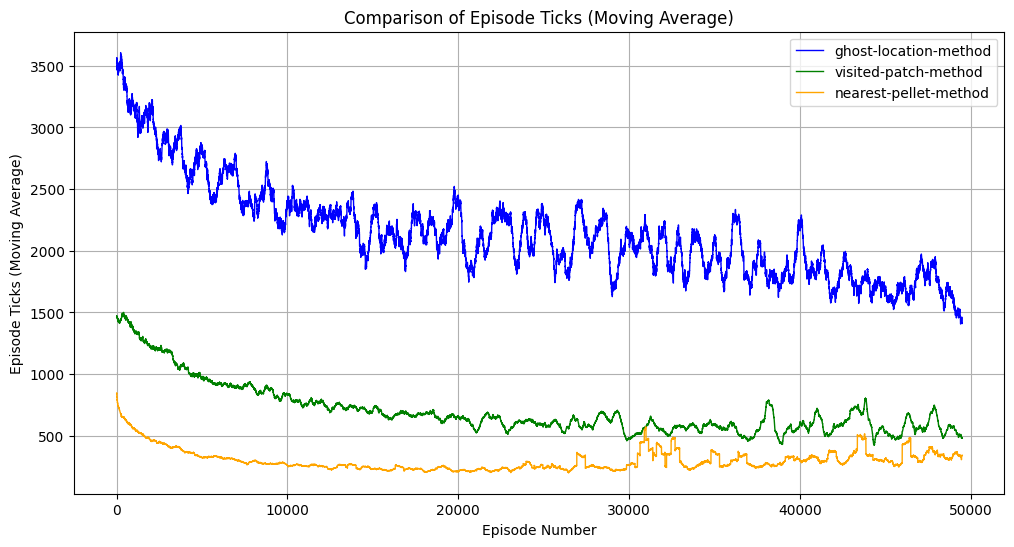

In [ ]:
compare_episode_ticks(p1_m1_2, p1_m2_2, p1_m3_2,
                      'ghost-location-method', 'visited-patch-method', 'nearest-pellet-method', save_graph=True)

### Combination Method

Max Episode Return: 175345.0
Min Episode Return: -1928265.0
Maximum Episode Return at Episode: 40839
Minimum Episode Return at Episode: 57
Average Episode Return: 154860.55587776488


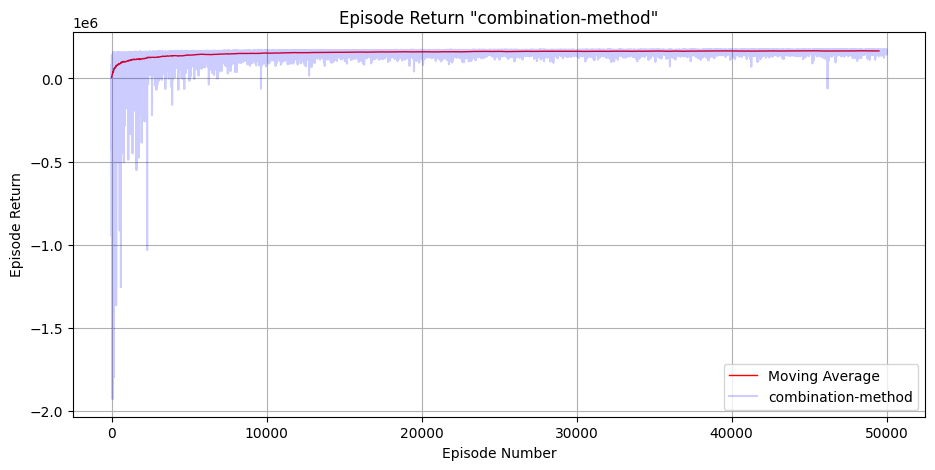

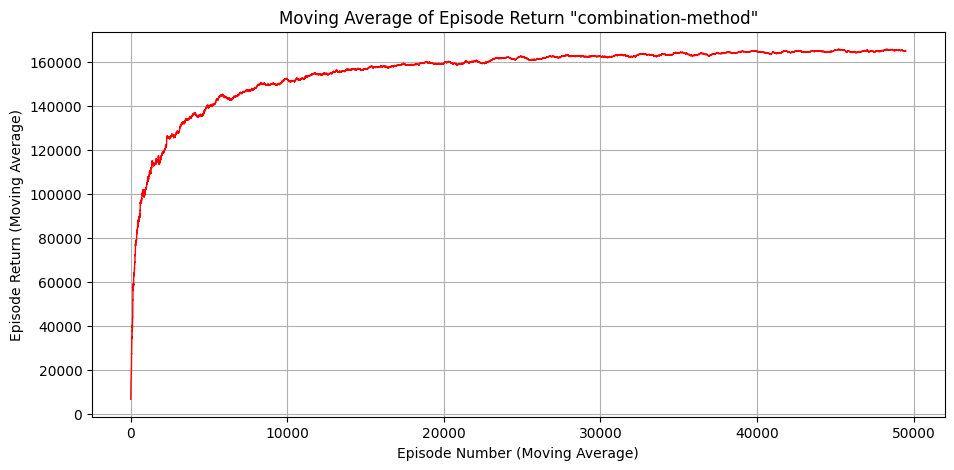

Max Episode Ticks: 5804.0
Min Episode Ticks: 60.0
Average Episode Ticks: 190.8453861845526


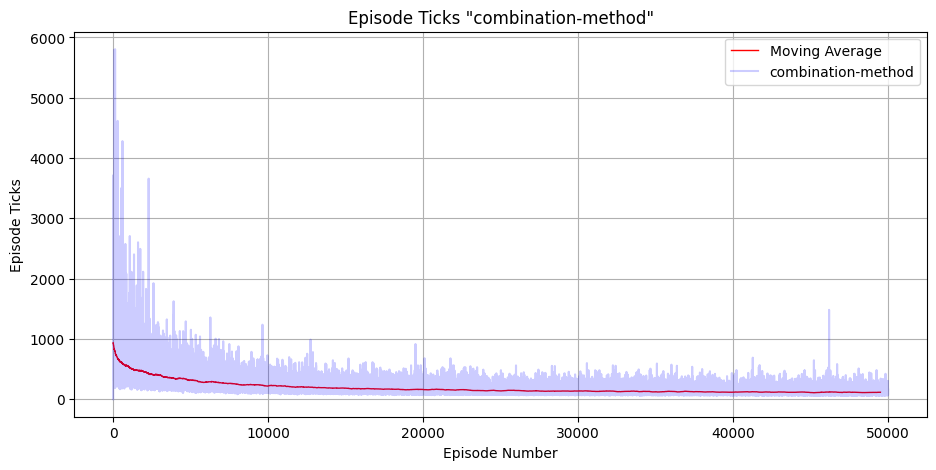

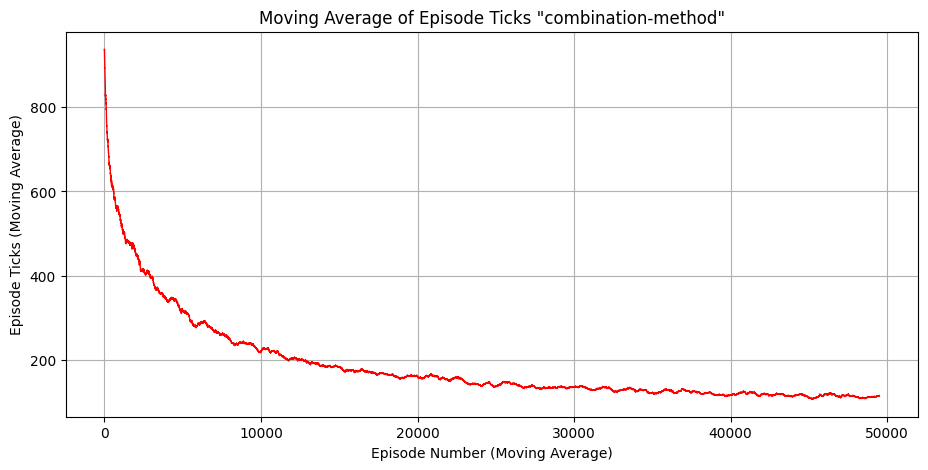

Max Episode Captures: 31.0
Average Episode Captures: 1.637874485020599


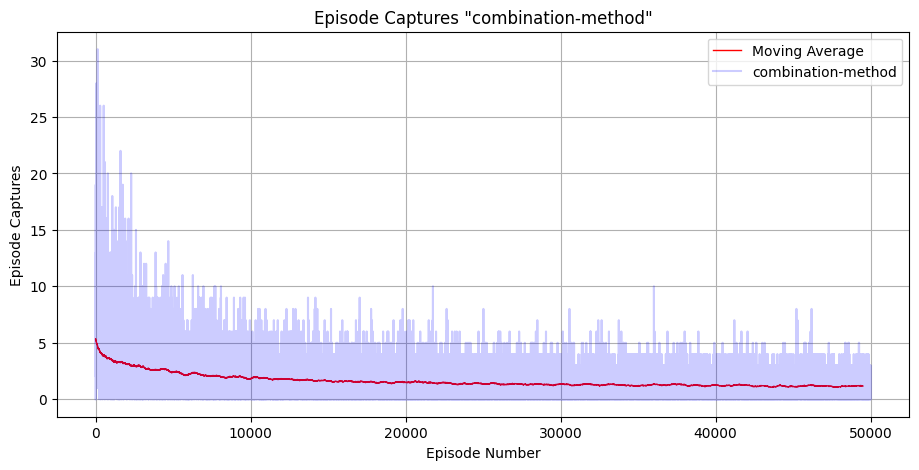

In [ ]:
graph_episode_return(p1_m4_1, 'combination-method', save_graph=True)
graph_episode_ticks(p1_m4_2, 'combination-method', save_graph=True)
graph_episode_captures(p1_m4_3, 'combination-method')    

### Comparison and the Combination Method

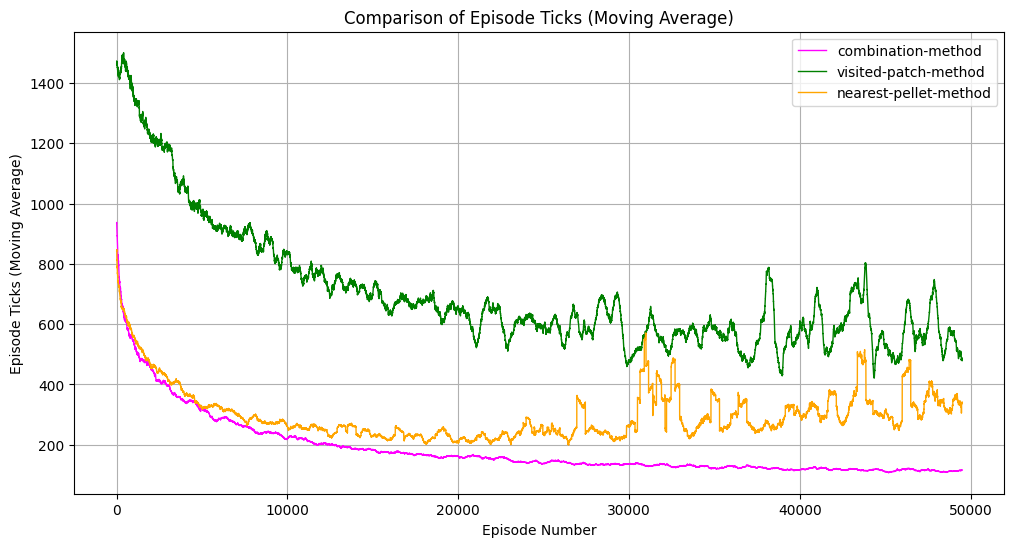

In [ ]:
compare_episode_ticks(p1_m4_2,p1_m2_2, p1_m3_2, 
                      'combination-method', 'visited-patch-method', 'nearest-pellet-method', color='magenta', save_graph=True)

## Ghost Results 

In [ ]:
def graph_episode_return_ghosts(txt_file1, txt_file2, name1, name2, name3 = "", color1 = 'red', color2 = 'green', save_graph=False):
    
    episode_return1 = np.loadtxt(txt_file1)
    episode_return2 = np.loadtxt(txt_file2)
    
    episode_number1 = len(episode_return1)
    episode_number2 = len(episode_return2)

    print("Episode Number Ghost Red", episode_number1)
    print("Episode Number Ghost Green", episode_number2)
    
    print("Average Episode Return Ghost Red:", np.mean(episode_return1))
    print("Average Episode Return Ghost Green:", np.mean(episode_return2))

    window = 500
    moving_avg1 = np.convolve(episode_return1, np.ones(window)/window, mode='valid')
    moving_avg2 = np.convolve(episode_return2, np.ones(window)/window, mode='valid')
    
    plt.figure(figsize=(11, 5))
    
    plt.plot(episode_return1, alpha=0.6, color=color1, label=name1)
    plt.plot(episode_return2, alpha=0.7, color=color2, label=name2)
    
    plt.plot(moving_avg1, linewidth=1, color='black' , label = 'Moving Average')   
    
    plt.xlabel('Episode Number')
    plt.ylabel('Episode Return')
    plt.title(f'Episode Return "{name3}"')
    plt.legend()
    plt.grid()
    
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-return-{name3}-compare.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')
    
    plt.show()

    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg1, linewidth=1, color=color1)
    plt.plot(moving_avg2, linewidth=1, color=color2)
    plt.xlabel('Episode Number (Moving Average)')
    plt.ylabel('Episode Return (Moving Average)')
    plt.title(f'Moving Average of Episode Return "{name3}"')
    plt.grid()
    plt.show()

In [ ]:
def graph_episode_ticks_ghosts(txt_file1, txt_file2, name1, name2, name3 = "", color1 = 'red', color2 = 'green', save_graph=False):
    
    episode_ticks1 = np.loadtxt(txt_file1)
    episode_ticks2 = np.loadtxt(txt_file2)
    
    episode_number1 = len(episode_ticks1)
    episode_number2 = len(episode_ticks2)

    print("Episode Number Ghost Red", episode_number1)
    print("Episode Number Ghost Green", episode_number2)

    print("Average Episode Ticks Ghost Red:", np.mean(episode_ticks1))
    print("Average Episode Ticks Ghost Green:", np.mean(episode_ticks2))

    window = 500
    moving_avg1 = np.convolve(episode_ticks1, np.ones(window)/window, mode='valid')
    moving_avg2 = np.convolve(episode_ticks2, np.ones(window)/window, mode='valid')
    
    plt.figure(figsize=(11, 5))
    
    plt.plot(episode_ticks1, alpha=0.6, color=color1, label=name1)
    plt.plot(episode_ticks2, alpha=0.7, color=color2, label=name2)
    
    plt.plot(moving_avg1, linewidth=1, color='black' , label = 'Moving Average')   
    
    plt.xlabel('Episode Number')
    plt.ylabel('Episode Ticks')
    plt.title(f'Episode Ticks "{name3}"')
    plt.legend()
    plt.grid()
    
    plt.show()

    plt.figure(figsize=(11, 5))
    plt.plot(moving_avg1, linewidth=1, color=color1, label=name1)
    plt.plot(moving_avg2, linewidth=1, color=color2, label=name2)
    plt.xlabel('Episode Number (Moving Average)')
    plt.ylabel('Episode Ticks (Moving Average)')
    plt.title(f'Moving Average of Episode Ticks "{name3}"')
    plt.legend()
    plt.grid()
    if save_graph:
        os.makedirs('Graphs', exist_ok=True)
        filepath = os.path.join('Graphs', f'episode-ticks-{name3}-compare.png')
        plt.savefig(filepath, dpi= 300, bbox_inches='tight')    
    plt.show()

### Approximate Method 

Episode Number Ghost Red 50189
Episode Number Ghost Green 49814
Average Episode Return Ghost Red: -40775.60720476598
Average Episode Return Ghost Green: -40852.309591681056


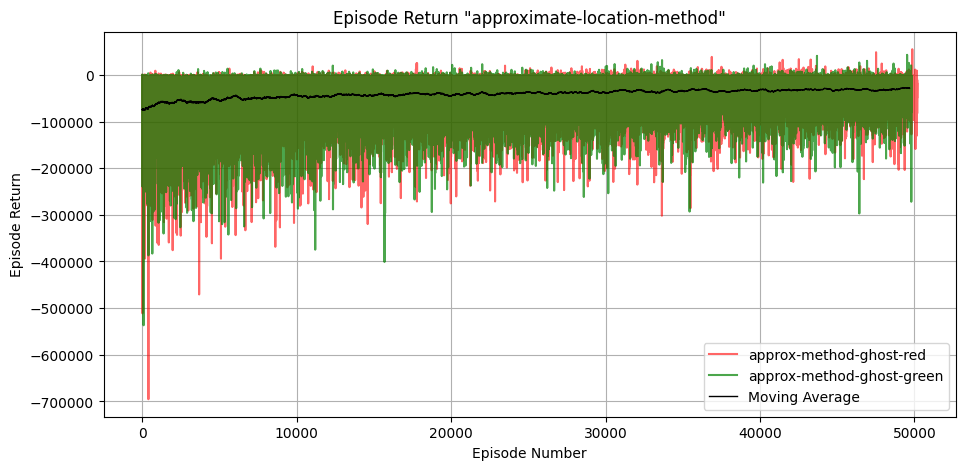

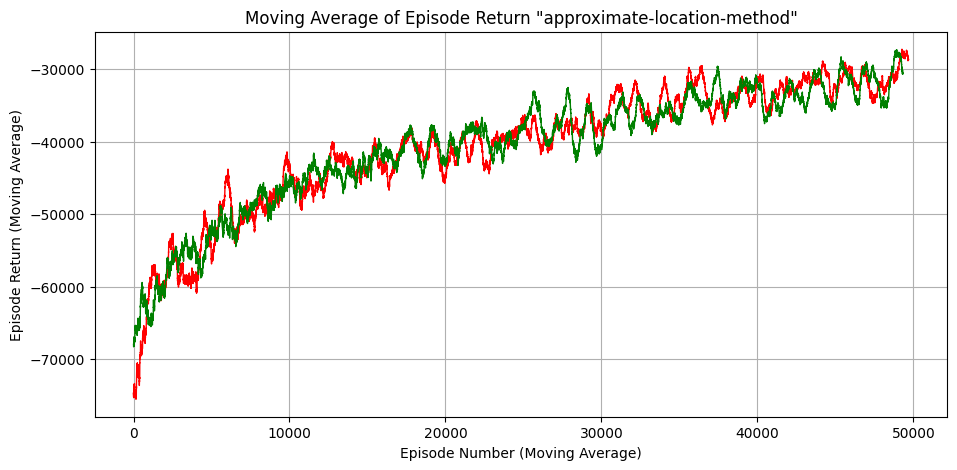

In [ ]:
graph_episode_return_ghosts(p2_m1_1_g1, p2_m1_1_g2,
                            'approx-method-ghost-red', 'approx-method-ghost-green', 'approximate-location-method', color1='red', color2='green', save_graph=True)

Episode Number Ghost Red 50189
Episode Number Ghost Green 49814
Average Episode Ticks Ghost Red: 254.4518519994421
Average Episode Ticks Ghost Green: 256.37208415304934


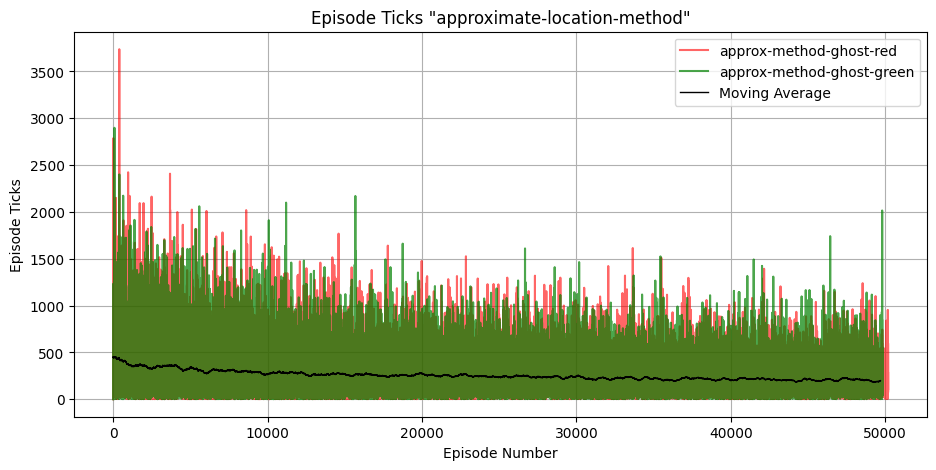

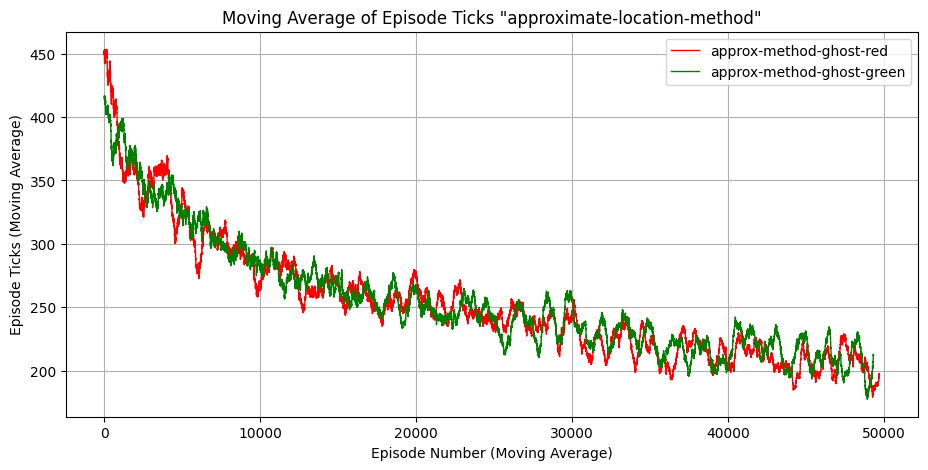

In [ ]:
graph_episode_ticks_ghosts(p2_m1_2_g1, p2_m1_2_g2,
                            'approx-method-ghost-red', 'approx-method-ghost-green', 'approximate-location-method', color1='red', color2='green', save_graph=True)

### Exact Method 

Episode Number Ghost Red 49408
Episode Number Ghost Green 49512
Average Episode Return Ghost Red: -87311.54509391192
Average Episode Return Ghost Green: -87164.4418524802


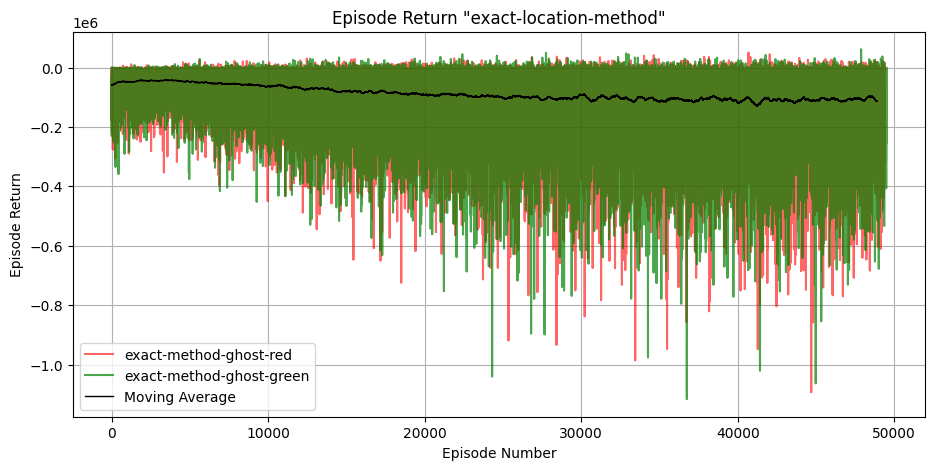

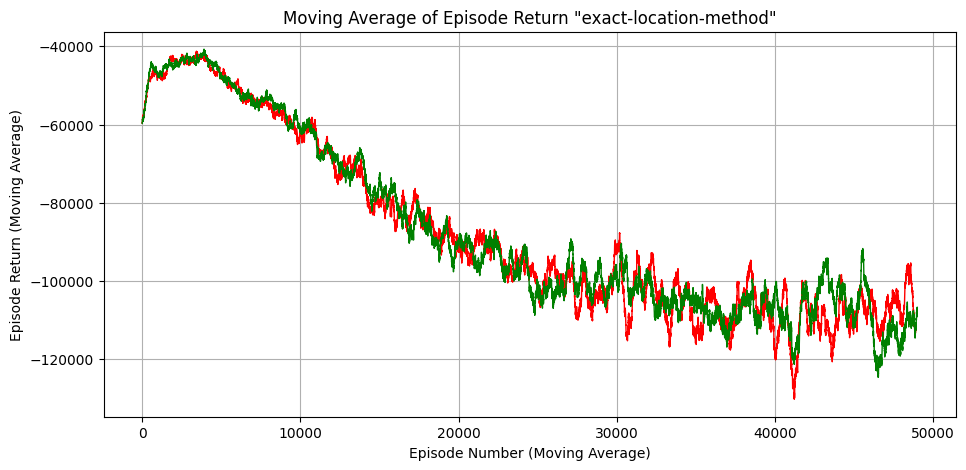

In [ ]:
graph_episode_return_ghosts(p2_m2_1_g1, p2_m2_1_g2,
                            'exact-method-ghost-red', 'exact-method-ghost-green', 'exact-location-method', color1='red', color2='green', save_graph=True)

Episode Number Ghost Red 49408
Episode Number Ghost Green 49512
Average Episode Ticks Ghost Red: 668.0752104922279
Average Episode Ticks Ghost Green: 666.6581434803684


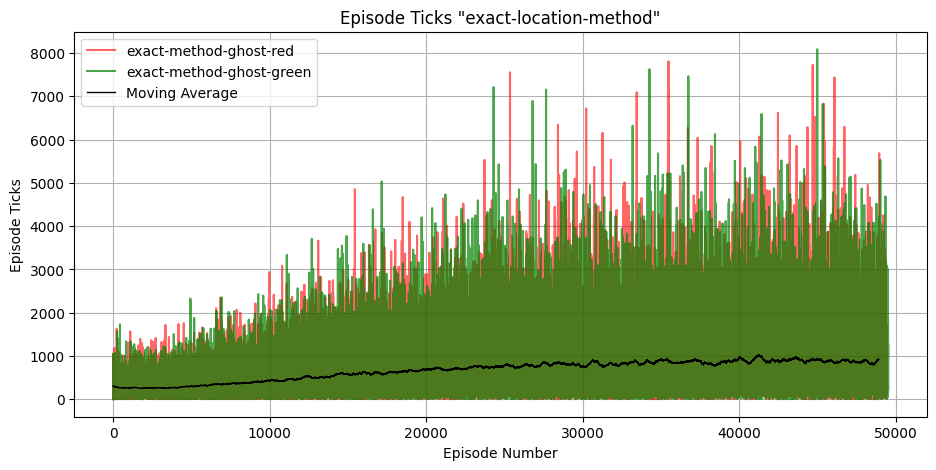

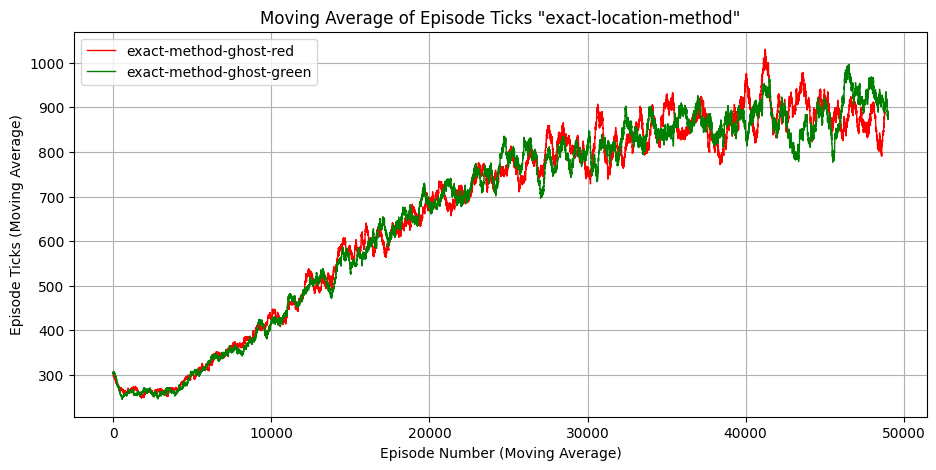

In [ ]:
graph_episode_ticks_ghosts(p2_m2_2_g1, p2_m2_2_g2,
                            'exact-method-ghost-red', 'exact-method-ghost-green', 'exact-location-method', color1='red', color2='green', save_graph=True)

### Joint Approximate 

Max Episode Return: 17900.0
Min Episode Return: -888300.0
Maximum Episode Return at Episode: 38341
Minimum Episode Return at Episode: 28889
Average Episode Return: -98822.54409823607


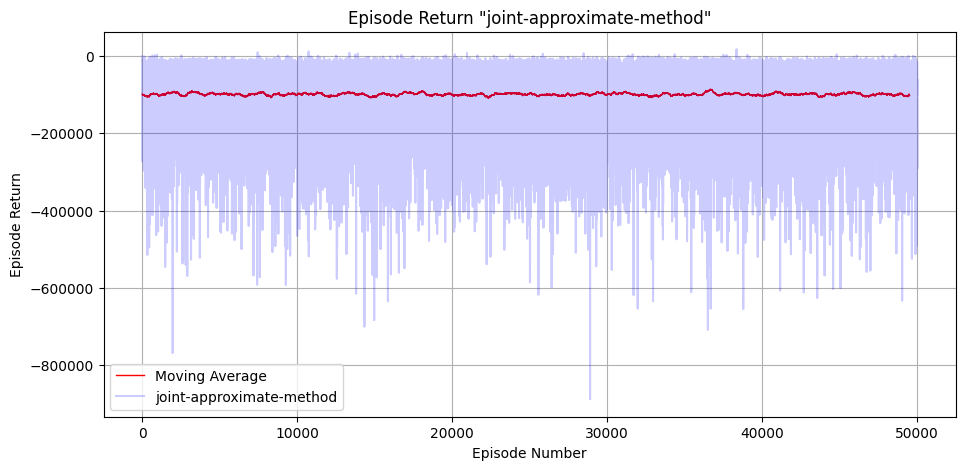

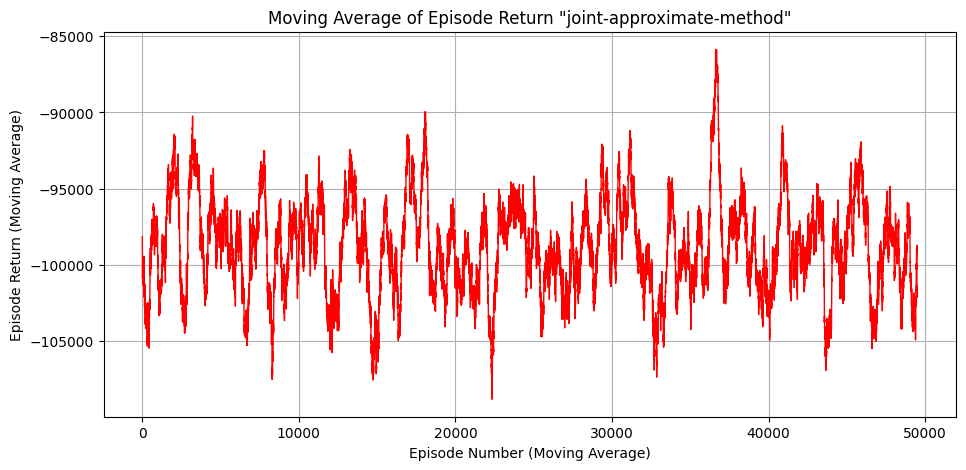

In [ ]:
graph_episode_return(p2_m3_1, 'joint-approximate-method', save_graph=True)

Max Episode Ticks: 2506.0
Min Episode Ticks: 15.0
Average Episode Ticks: 287.9468021279149


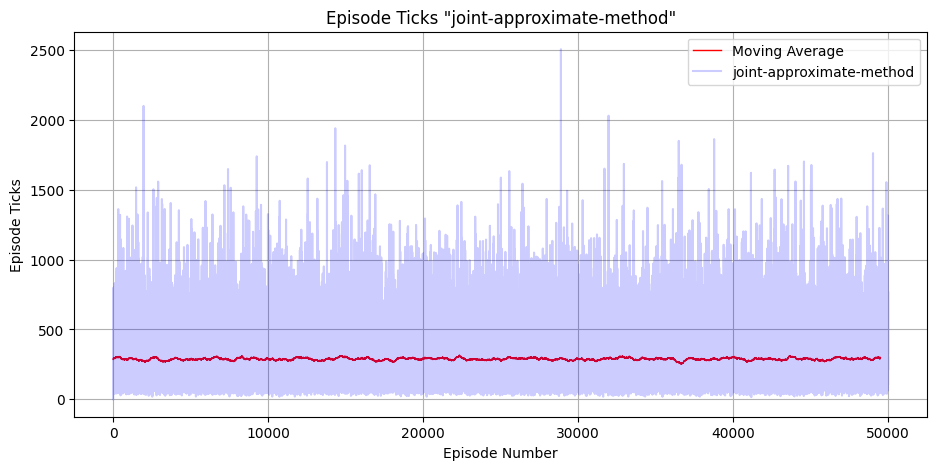

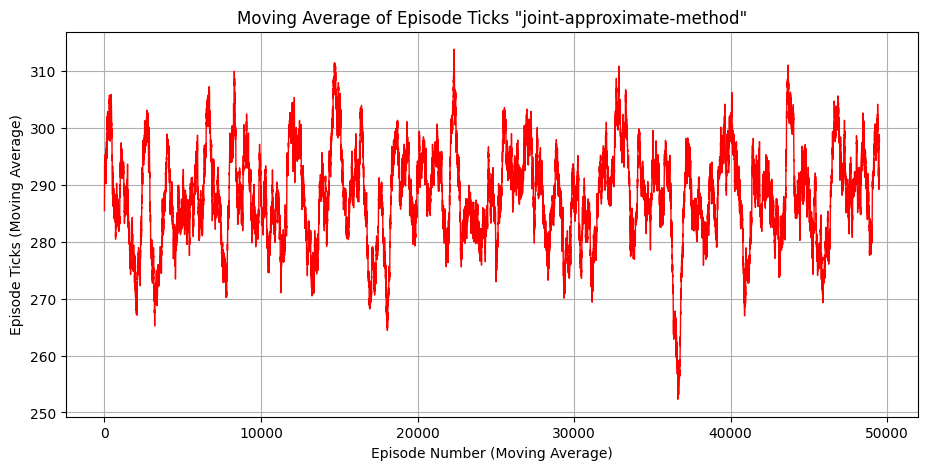

In [ ]:
graph_episode_ticks(p2_m3_2, 'joint-approximate-method', save_graph=True)

### Joint Exact

Max Episode Return: 13395.0
Min Episode Return: -1155805.0
Maximum Episode Return at Episode: 22641
Minimum Episode Return at Episode: 41954
Average Episode Return: -126511.81822727091


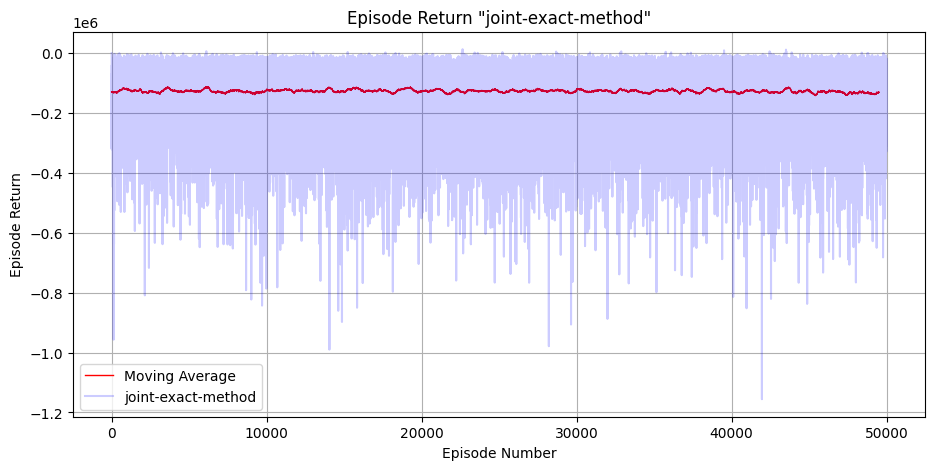

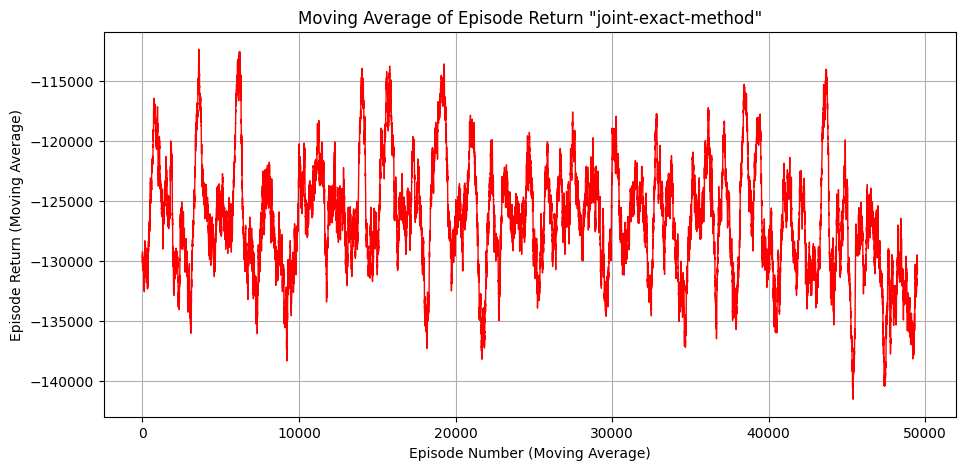

In [ ]:
graph_episode_return(p2_m4_1, 'joint-exact-method', save_graph=True)

Max Episode Ticks: 2481.0
Min Episode Ticks: 12.0
Average Episode Ticks: 295.29256829726813


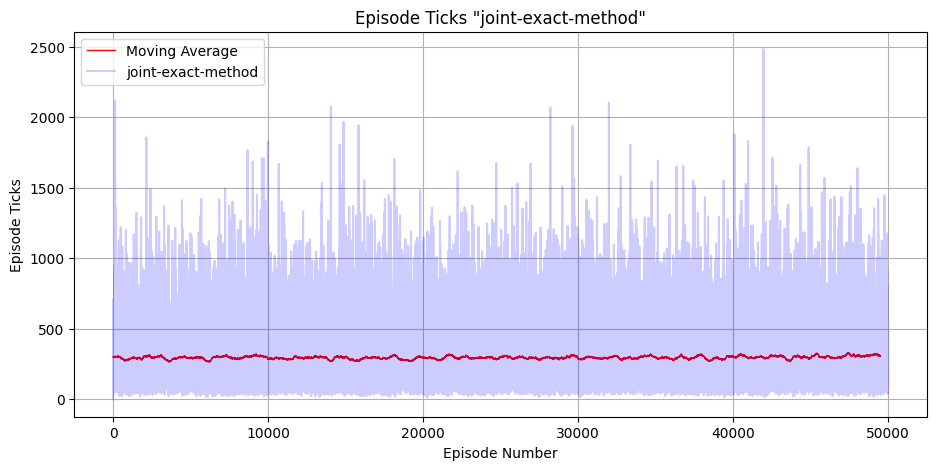

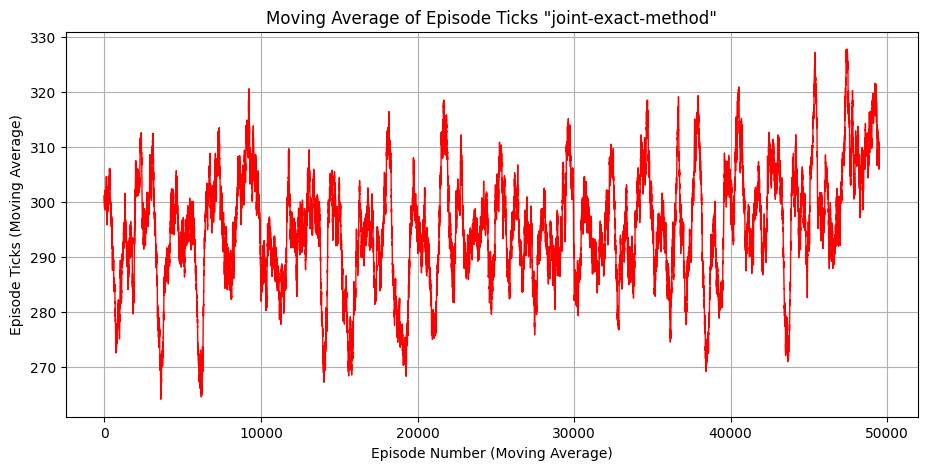

In [ ]:
graph_episode_ticks(p2_m4_2, 'joint-exact-method', save_graph=True)

### VS

Episode Number Ghost Red 50189
Episode Number Ghost Green 50002
Average Episode Ticks Ghost Red: 254.4518519994421
Average Episode Ticks Ghost Green: 287.9468021279149


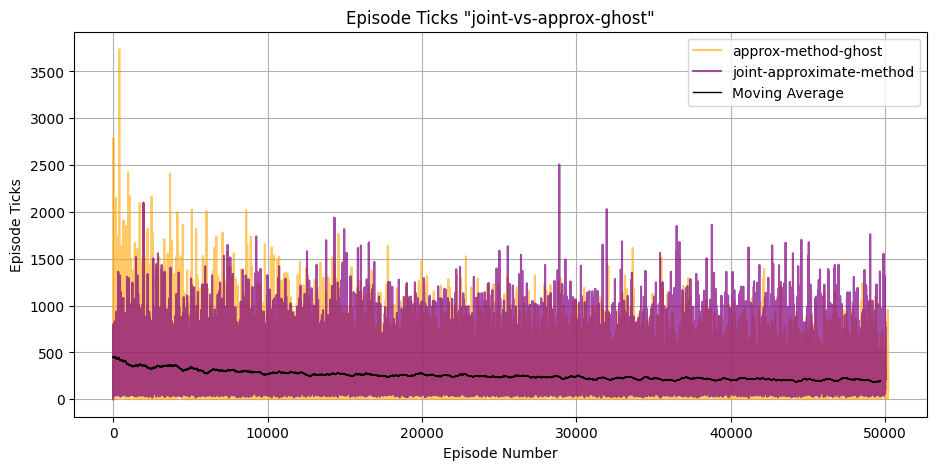

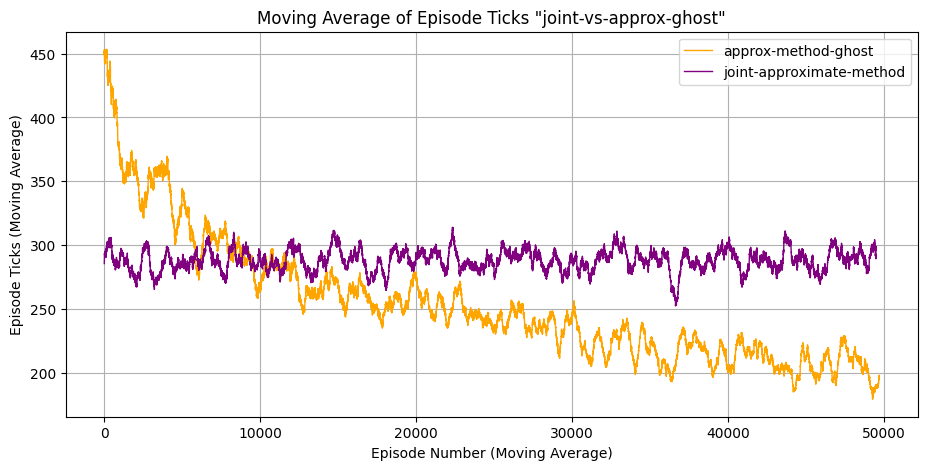

In [ ]:
graph_episode_ticks_ghosts(p2_m1_2_g1, p2_m3_2,
                            'approx-method-ghost', 'joint-approximate-method', 'joint-vs-approx-ghost', color1='orange', color2='purple', save_graph=True)

Episode Number Ghost Red 49408
Episode Number Ghost Green 50002
Average Episode Ticks Ghost Red: 668.0752104922279
Average Episode Ticks Ghost Green: 295.29256829726813


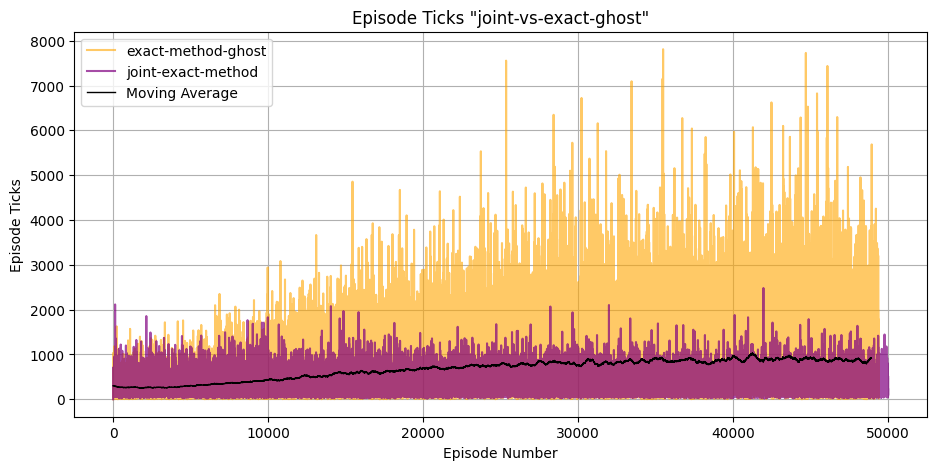

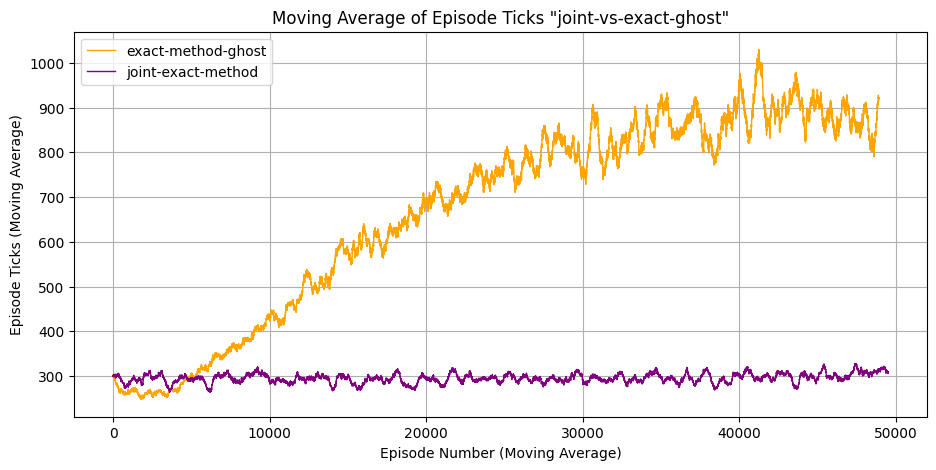

In [ ]:
graph_episode_ticks_ghosts(p2_m2_2_g1, p2_m4_2,
                            'exact-method-ghost', 'joint-exact-method', 'joint-vs-exact-ghost', color1='orange', color2='purple', save_graph=True)

Episode Number Ghost Red 50002
Episode Number Ghost Green 50002
Average Episode Ticks Ghost Red: 190.8453861845526
Average Episode Ticks Ghost Green: 181.33458661653535


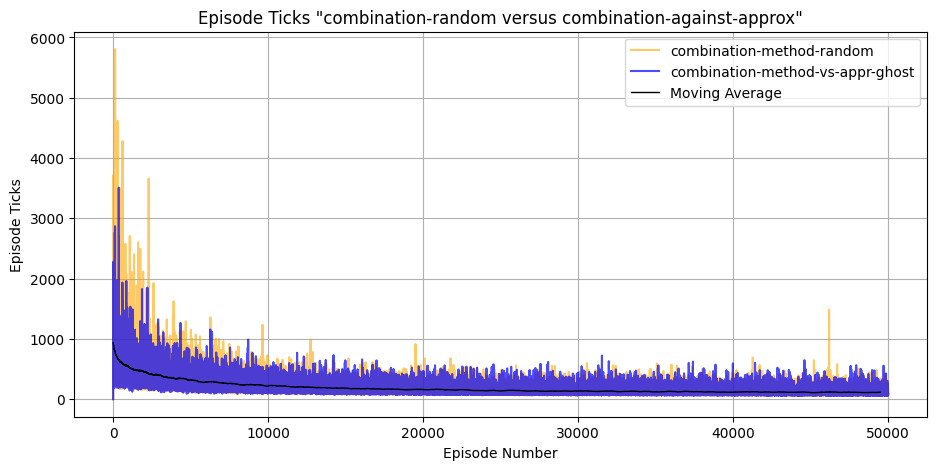

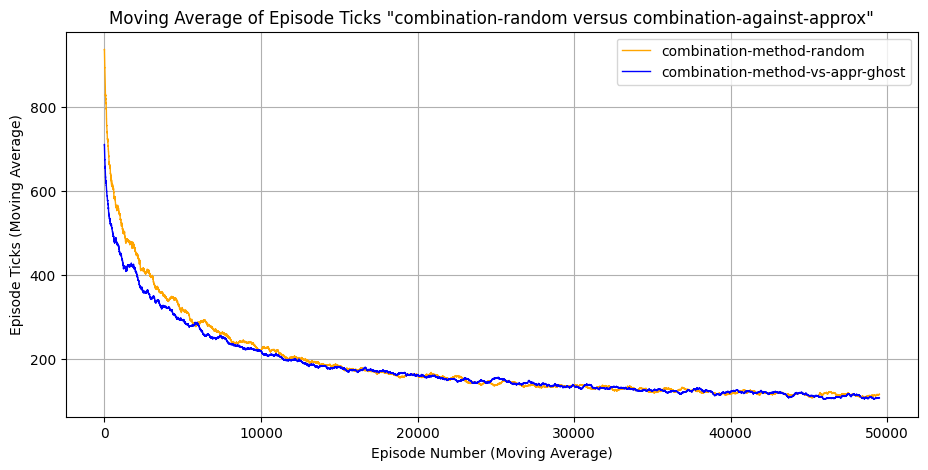

In [ ]:
graph_episode_ticks_ghosts(p1_m4_2, p3_m1_2, 'combination-method-random', 'combination-method-vs-appr-ghost', 'combination-random versus combination-against-approx', color1='orange', color2='blue', save_graph=True)

In [ ]:
graph_episode_ticks_ghosts(p2_m1_2_g1, p3_m1_5, 'approx-method-random', 'approx-method-vs-combination-pacman', 'approximate-random versus approximate-against-combination', color1='red', color2='purple', save_graph=True)

NameError: name 'p3_m5_2' is not defined

In [ ]:
graph_episode_return(p3_m1_1, 'ep-return-pacman', save_graph=True)
graph_episode_ticks(p3_m1_2, 'vs-method-ep-ticks-pacman', save_graph=True)
graph_episode_captures(p3_m1_3, 'vs-method-ep-captures-pacman')

In [ ]:
graph_episode_ticks_ghosts()